                                  # Heart_Disease_Prediction&Algorithm_Comparison-SVM-KNN                      

### heart disease prediction using SVM and KNN algorithms. In this project, we will use the UCI Heart Disease dataset to build and compare the performance of Support Vector Machine (SVM) and K-Nearest Neighbors (KNN) algorithms for predicting heart disease.

# Import The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/heart_disease_uci.csv')

In [3]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Dataset Column Descriptions

## Feature Variables

| Column | Description |
|--------|-------------|
| **id** | Unique identifier for each patient record |
| **age** | Patient's age in years |
| **sex** | Patient's gender (Male/Female) |
| **dataset** | Source dataset (Cleveland in this case) |
| **cp** | Chest pain type |
| **trestbps** | Resting blood pressure (in mm Hg) |
| **chol** | Serum cholesterol level (in mg/dl) |
| **fbs** | Fasting blood sugar > 120 mg/dl (True/False) |
| **restecg** | Resting electrocardiographic results |
| **thalch** | Maximum heart rate achieved during exercise |
| **exang** | Exercise induced angina (True/False) |
| **oldpeak** | ST depression induced by exercise relative to rest |
| **slope** | Slope of the peak exercise ST segment |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy |
| **thal** | Thalassemia type |

## Categorical Variable Details

### Chest Pain Type (cp):
- **typical angina**: Classic chest pain related to heart disease
- **atypical angina**: Chest pain not typical of heart disease
- **non-anginal**: Chest pain not related to heart disease
- **asymptomatic**: No chest pain symptoms

### Resting ECG Results (restecg):
- **normal**: Normal electrocardiogram
- **having ST-T wave abnormality**: Abnormal ST-T wave patterns
- **lv hypertrophy**: Left ventricular hypertrophy (enlarged heart muscle)

### ST Segment Slope (slope):
- **upsloping**: Upward sloping ST segment
- **flat**: Flat ST segment
- **downsloping**: Downward sloping ST segment

### Thalassemia Type (thal):
- **normal**: Normal thalassemia
- **fixed defect**: Fixed defect in thalassemia
- **reversable defect**: Reversible defect in thalassemia

## Target Variable

| Column | Description |
|--------|-------------|
| **num** | **Target variable** - Presence of heart disease |

**Target Values:**
- **0**: No heart disease
- **1-4**: Varying degrees of heart disease presence (1 = mild, 4 = severe)

---

**Note:** The `num` column is your target variable for prediction in this heart disease classification task.

# Data Analyse

In [4]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
df.shape

(920, 16)

In [6]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Handling Missing Values

## Numerical Data

In [7]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [8]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
df['chol'] = df['chol'].fillna(df['chol'].mean())

In [10]:
df['thalch']=df['thalch'].fillna(df['thalch'].mean())

In [11]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())

In [12]:
df['ca']=df['ca'].fillna(df['ca'].mode()[0])

In [13]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.0,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.0,NaN,0


In [14]:
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

## For Categorical Data

In [15]:
categorical_cols = ['fbs', 'exang', 'slope', 'thal', 'restecg']

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else df[col].value_counts().index[0]
        df[col] = df[col].fillna(mode_value)
        print(f"Filled {col} missing values with mode: {mode_value}")

# Final check for missing values
print("\n" + "="*50)
print("Final missing values check:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Filled fbs missing values with mode: False
Filled exang missing values with mode: False
Filled slope missing values with mode: flat
Filled thal missing values with mode: normal
Filled restecg missing values with mode: normal

Final missing values check:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Total missing values: 0


C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_10516\3152665606.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df = df.drop(['dataset'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        920 non-null    float64
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(5)
memory usage: 95.4+ KB


# Data Visualization

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

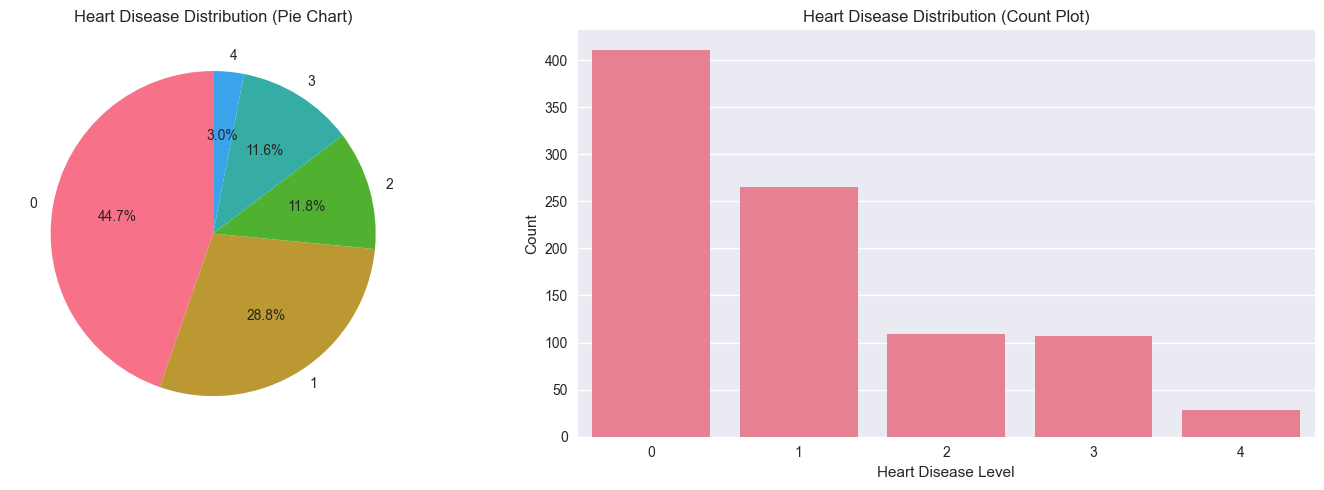

In [20]:
# 1. Target Variable Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
target_counts = df['num'].value_counts().sort_index()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Distribution (Pie Chart)')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='num')
plt.title('Heart Disease Distribution (Count Plot)')
plt.xlabel('Heart Disease Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

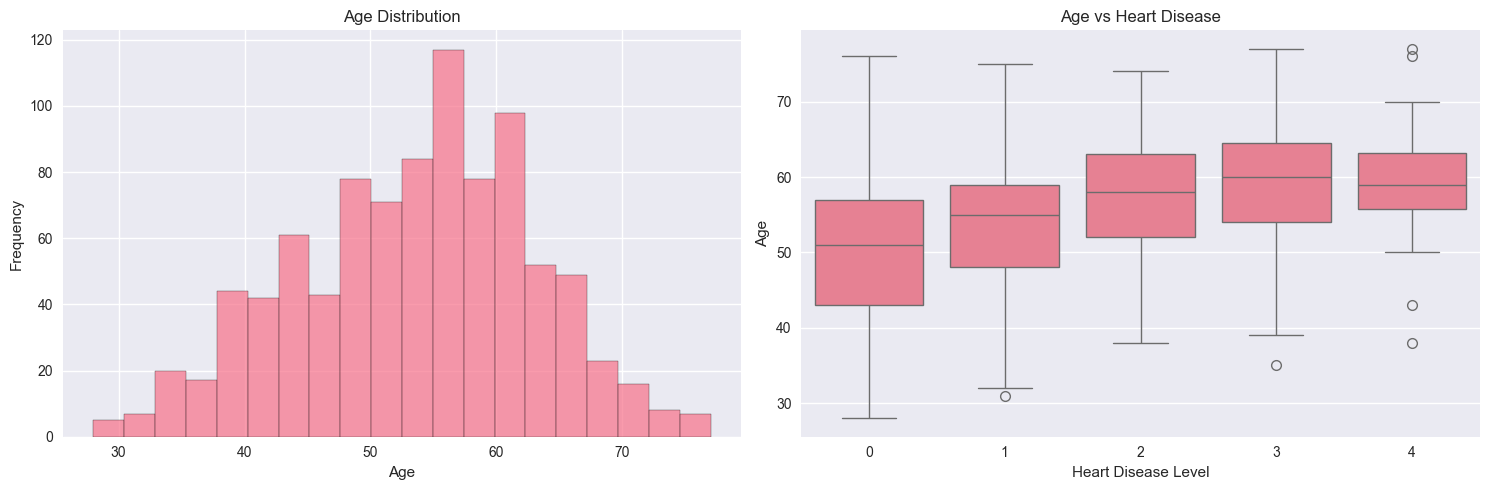

In [21]:
# 2. Age Distribution and Heart Disease
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='num', y='age')
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease Level')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

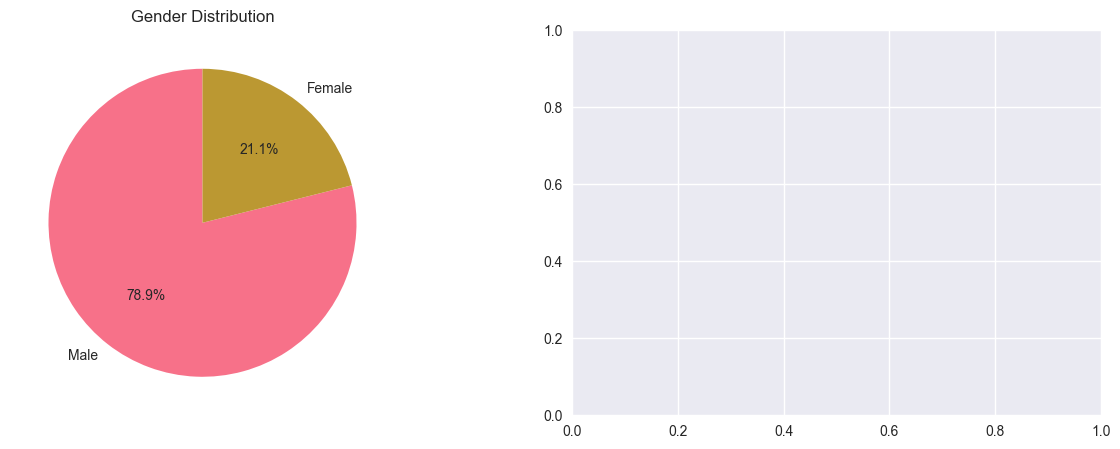

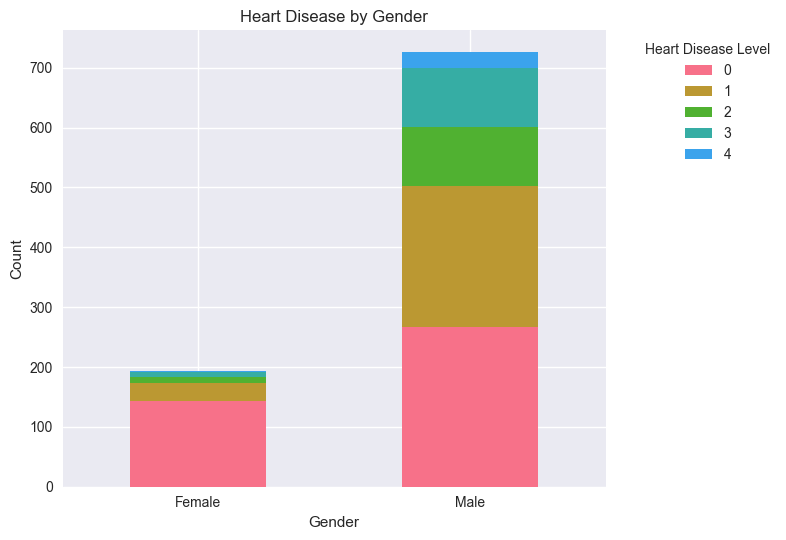

In [22]:
# 3. Gender Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
pd.crosstab(df['sex'], df['num']).plot(kind='bar', stacked=True)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

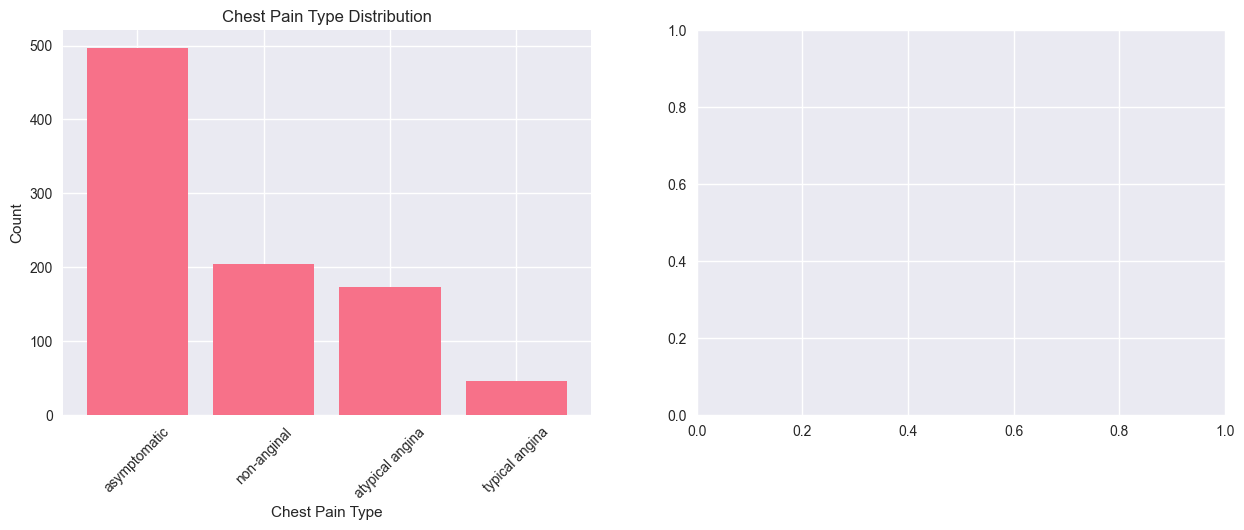

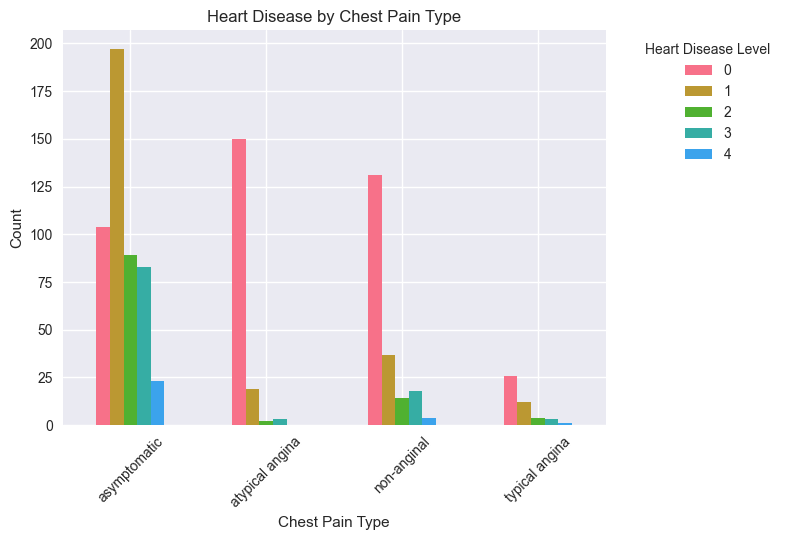

In [23]:
# 4. Chest Pain Type Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
cp_counts = df['cp'].value_counts()
plt.bar(cp_counts.index, cp_counts.values)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
pd.crosstab(df['cp'], df['num']).plot(kind='bar')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


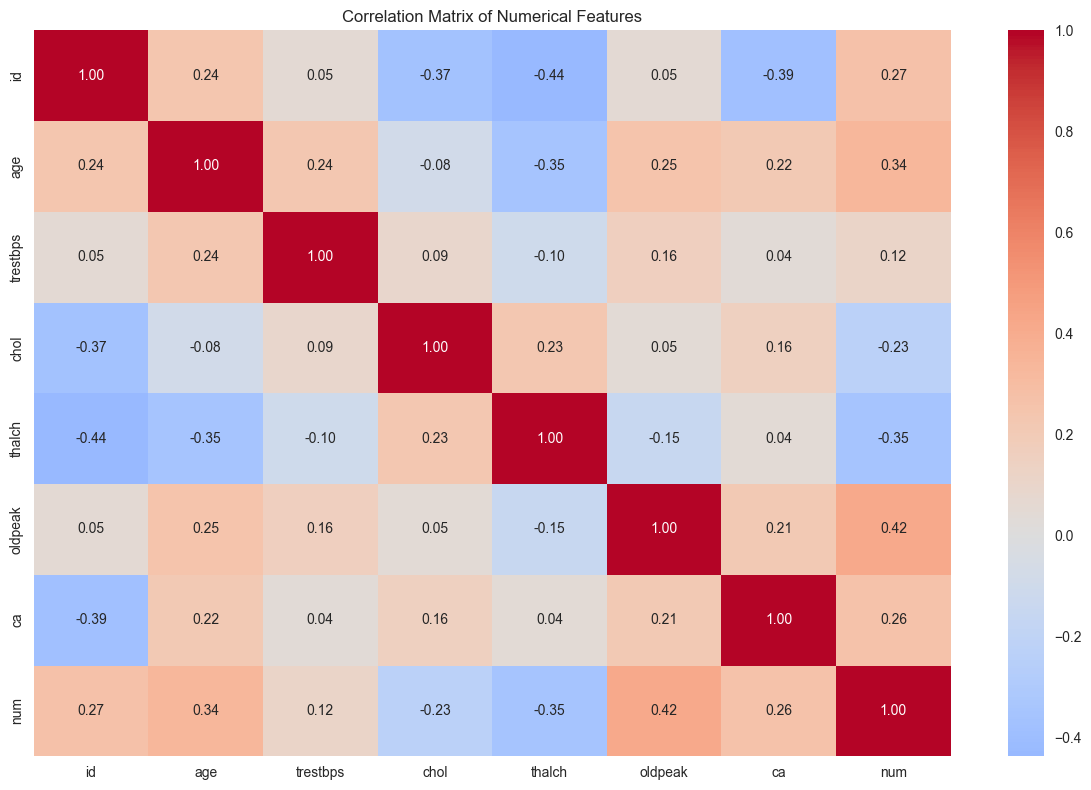

In [24]:
# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

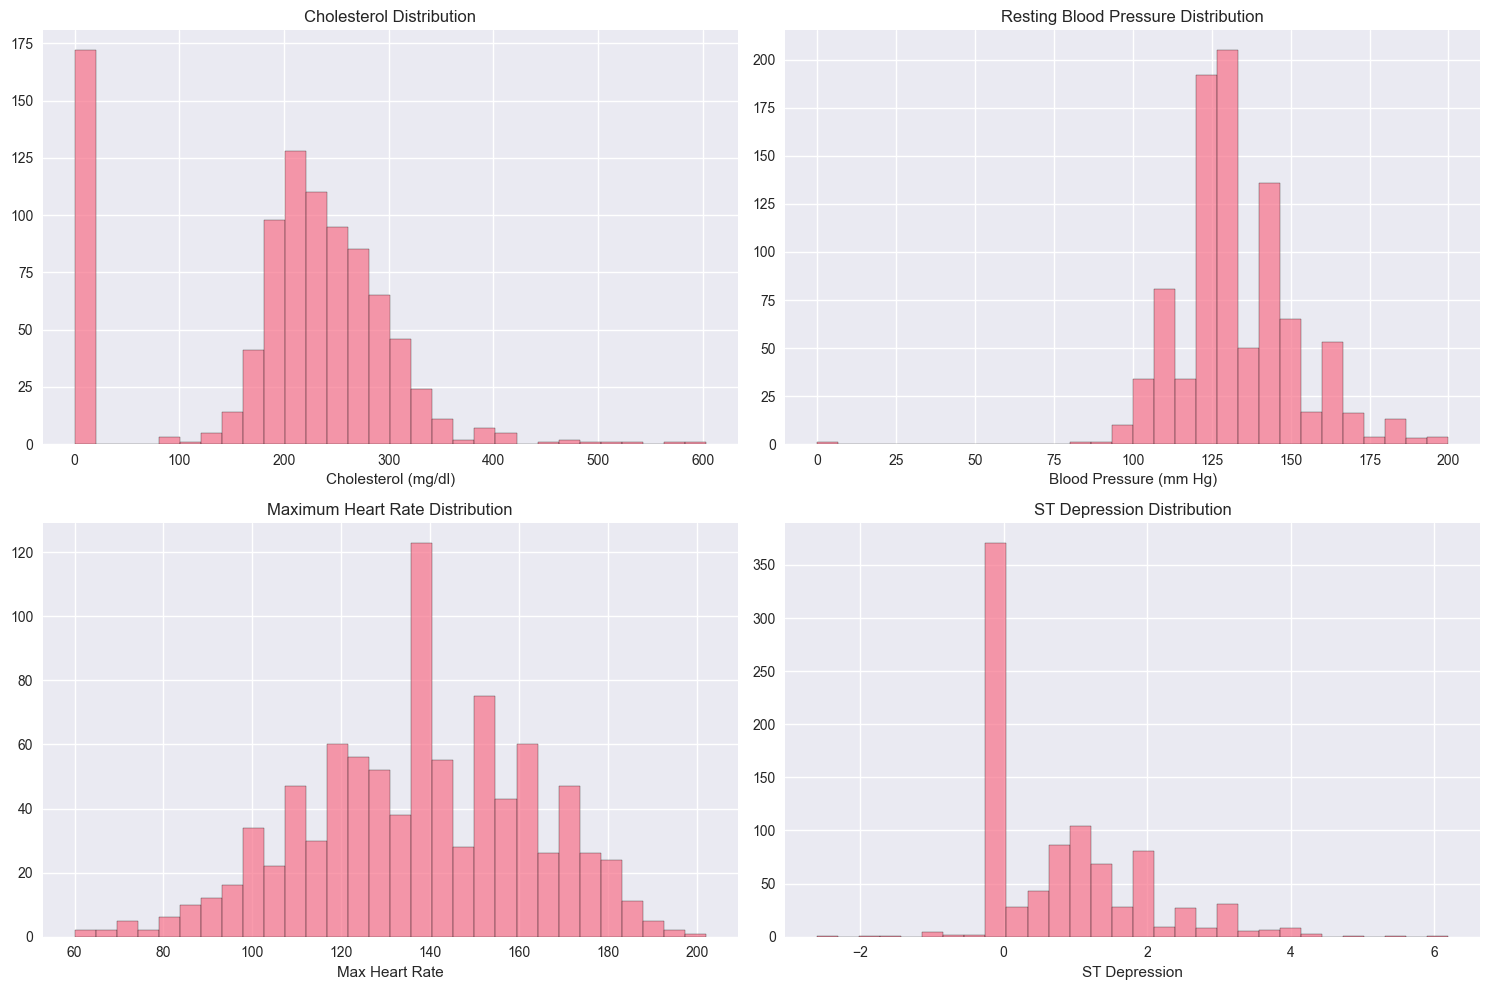

In [25]:
# 6. Key Health Metrics Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Cholesterol
axes[0, 0].hist(df['chol'], bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Cholesterol Distribution')
axes[0, 0].set_xlabel('Cholesterol (mg/dl)')

# Resting Blood Pressure
axes[0, 1].hist(df['trestbps'], bins=30, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Resting Blood Pressure Distribution')
axes[0, 1].set_xlabel('Blood Pressure (mm Hg)')

# Maximum Heart Rate
axes[1, 0].hist(df['thalch'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Maximum Heart Rate Distribution')
axes[1, 0].set_xlabel('Max Heart Rate')

# ST Depression
axes[1, 1].hist(df['oldpeak'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('ST Depression Distribution')
axes[1, 1].set_xlabel('ST Depression')

plt.tight_layout()
plt.show()


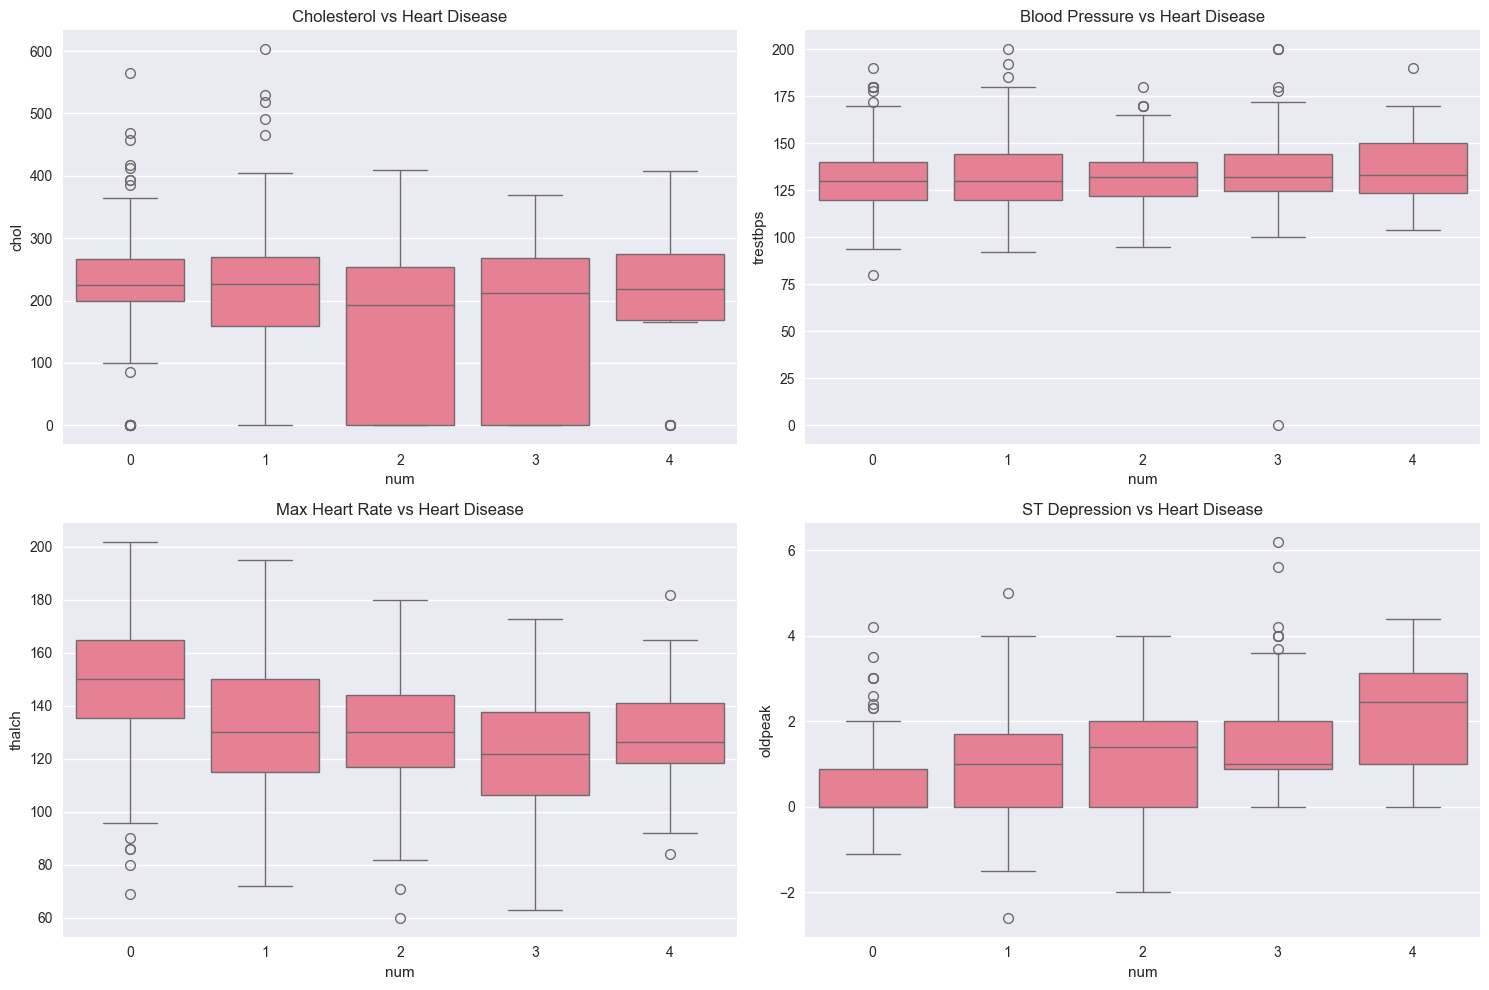

In [26]:
# 7. Heart Disease vs Key Health Metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=df, x='num', y='chol', ax=axes[0, 0])
axes[0, 0].set_title('Cholesterol vs Heart Disease')

sns.boxplot(data=df, x='num', y='trestbps', ax=axes[0, 1])
axes[0, 1].set_title('Blood Pressure vs Heart Disease')

sns.boxplot(data=df, x='num', y='thalch', ax=axes[1, 0])
axes[1, 0].set_title('Max Heart Rate vs Heart Disease')

sns.boxplot(data=df, x='num', y='oldpeak', ax=axes[1, 1])
axes[1, 1].set_title('ST Depression vs Heart Disease')

plt.tight_layout()
plt.show()

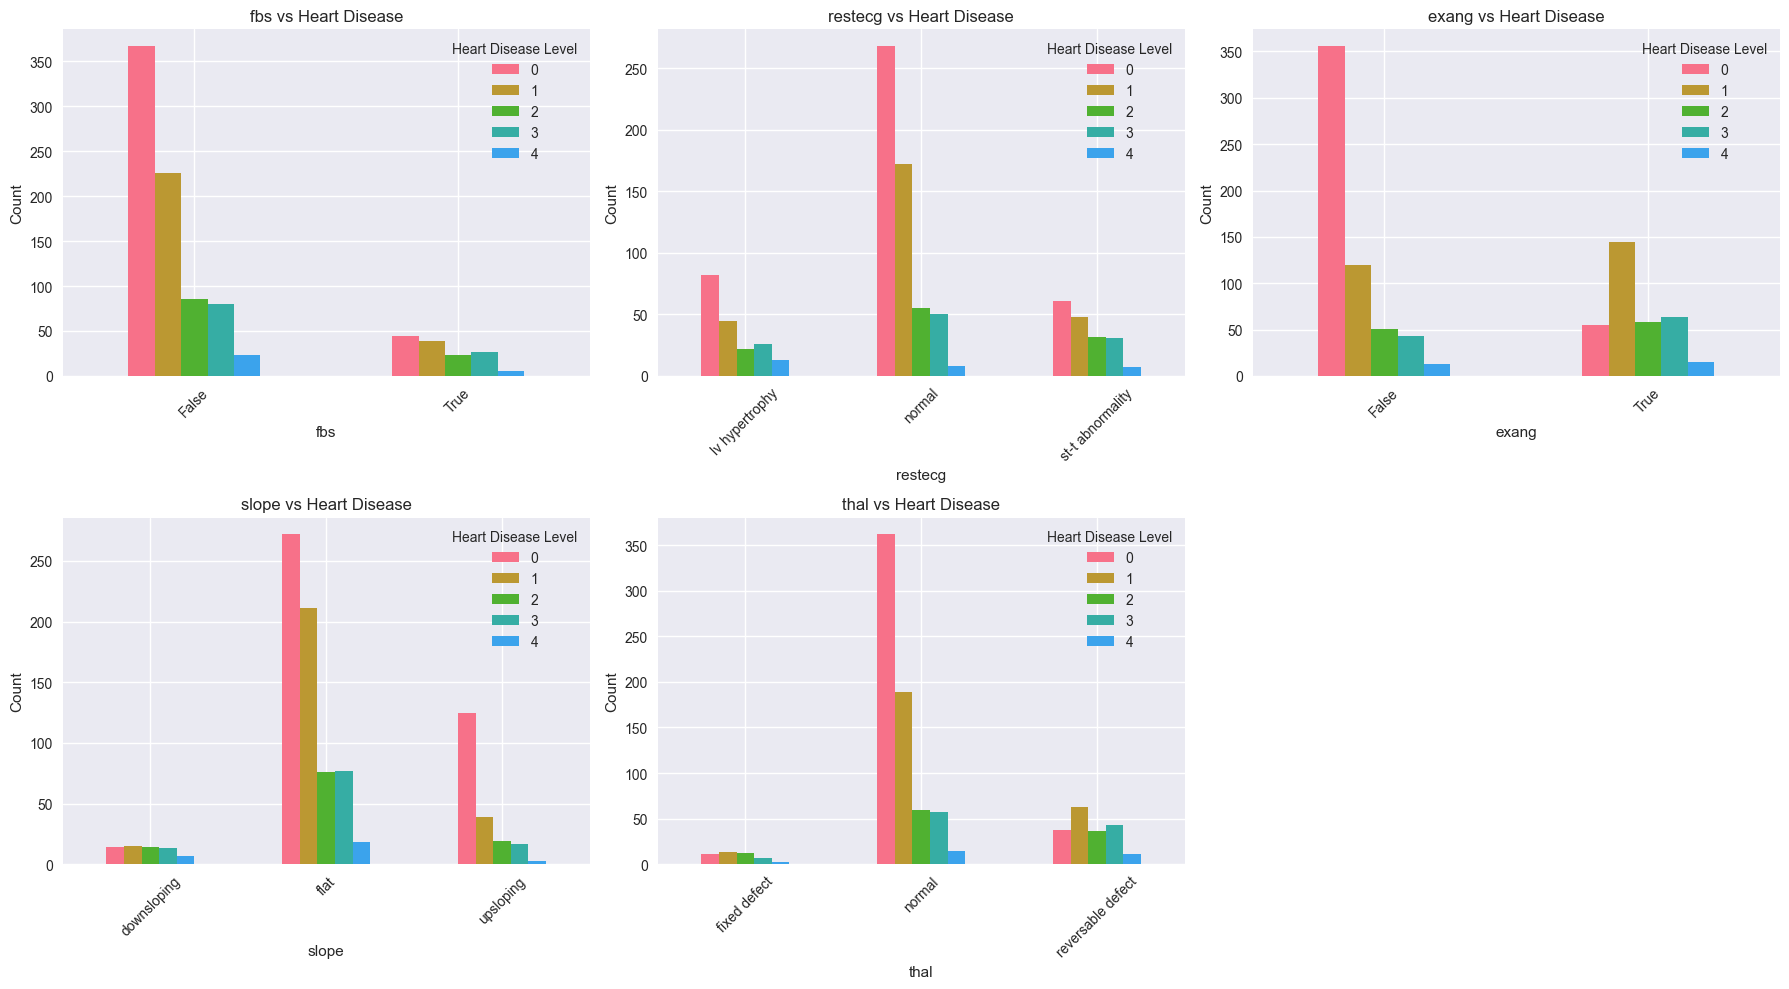

In [27]:
# 8. Categorical Features Analysis
categorical_features = ['fbs', 'restecg', 'exang', 'slope', 'thal']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    pd.crosstab(df[feature], df['num']).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{feature} vs Heart Disease')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Heart Disease Level')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [28]:
# 9. Summary Statistics
print("="*60)
print("DATASET SUMMARY STATISTICS")
print("="*60)
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print("\nTarget Variable Distribution:")
print(df['num'].value_counts().sort_index())
print(f"\nTarget Variable Percentages:")
print((df['num'].value_counts(normalize=True) * 100).round(2).sort_index())

DATASET SUMMARY STATISTICS
Total Records: 920
Total Features: 15
Missing Values: 0

Target Variable Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target Variable Percentages:
num
0    44.67
1    28.80
2    11.85
3    11.63
4     3.04
Name: proportion, dtype: float64


# Build The Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
import joblib
import pickle

In [30]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [34]:
le_sex = LabelEncoder()
le_cp = LabelEncoder()
le_restecg = LabelEncoder()
le_exang = LabelEncoder()
le_slope = LabelEncoder()
le_fbs = LabelEncoder()
le_thal = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['cp'] = le_cp.fit_transform(df['cp'])
df['restecg'] = le_restecg.fit_transform(df['restecg'])
df['exang'] = le_exang.fit_transform(df['exang'])
df['slope'] = le_slope.fit_transform(df['slope'])
df['fbs'] = le_fbs.fit_transform(df['fbs'])
df['thal'] = le_thal.fit_transform(df['thal'])
print("Encoded Successfully")



Encoded Successfully


In [35]:
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,3,145.000000,233.0,1,0,150.000000,0,2.300000,0,0.0,0,0
1,2,67,1,0,160.000000,286.0,0,0,108.000000,1,1.500000,1,3.0,1,2
2,3,67,1,0,120.000000,229.0,0,0,129.000000,1,2.600000,1,2.0,2,1
3,4,37,1,2,130.000000,250.0,0,1,187.000000,0,3.500000,0,0.0,1,0
4,5,41,0,1,130.000000,204.0,0,0,172.000000,0,1.400000,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,0,127.000000,333.0,1,2,154.000000,0,0.000000,1,0.0,1,1
916,917,62,1,3,132.132404,139.0,0,2,137.545665,0,0.878788,1,0.0,1,0
917,918,55,1,0,122.000000,223.0,1,2,100.000000,0,0.000000,1,0.0,0,2
918,919,58,1,0,132.132404,385.0,1,0,137.545665,0,0.878788,1,0.0,1,0
